# Assignment (Healthcare and Artificial Intelligence)
The objective of this assignment is to get you familiarizewith  the  problems  of  `classification`  and  `verification`with a popular problem space of `face`

This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Allowed Libraries
- All libraries are allowed 

## Datasets 
- 3 datasets are provided. Load the data from the drive [link](!https://drive.google.com/file/d/1ujsKv9W5eidb4TXt1pnsqwDKVDFtzZTh/view?usp=sharing).
- Unzip the downloaded file and store the files in a folder called `datasets`. Keep the `datasets` folder in the same directory as of the jupyter notebook 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `name.ipynb` and submit the notebook file on Github Repo with plots/vizualizations saved.

In [40]:
# Installing Libraries
!pip install scikit-learn matplotlib Pillow

You should consider upgrading via the 'c:\users\aisha\anaconda3\new folder (2)\python.exe -m pip install --upgrade pip' command.


In [38]:
# Basic Imports
import os
import sys
import warnings
import numpy as  np
import pandas as pd
from scipy import linalg

# Loading and plotting data
from PIL import Image
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Features
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import _class_means,_class_cov
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

import warnings

plt.ion()
%matplotlib inline
warnings.filterwarnings('ignore')

# Parameters
- Image size: Bigger images create better representation but would require more computation. Choose the correct image size based on your Laptop configuration. 
- is_grayscale: Should you take grayscale images? Or rgb images? Choose whichever gives better representation for classification. 

In [3]:
opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

### Load Dataset

In [4]:
cfw_dict = {'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7}

imfdb_dict = {'MadhuriDixit': 0,
     'Kajol': 1,
     'SharukhKhan': 2,
     'ShilpaShetty': 3,
     'AmitabhBachan': 4,
     'KatrinaKaif': 5,
     'AkshayKumar': 6,
     'Amir': 7}

# Load Image using PIL for dataset
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

# Load the full data from directory
def load_data(dir_path):
    image_list = []
    y_list = []
    
    if "CFW" in dir_path:
        label_dict = cfw_dict

    elif "yale" in dir_path.lower():
        label_dict = {}
        for i in range(15):
            label_dict[str(i+1)] = i
    elif "IMFDB" in dir_path:
        label_dict = imfdb_dict
    else:
        raise KeyError("Dataset not found.")
    
    
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

    print("Dataset shape:",image_list.shape)

    return image_list,y_list

# Display N Images in a nice format
def disply_images(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

In [5]:
# Loading the dataset
# eg.
dirpath = 'C:\\Users\\Aisha\\Downloads\\IIIT-Assignment\\dataset\\dataset\\IMFDB'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

Dataset shape: (400, 32, 32, 3)


In [6]:
dirpath_IIIT = 'C:\\Users\\Aisha\\Downloads\\IIIT-Assignment\\dataset\\dataset\\IIIT-CFW'
X_IIIT,y_IIIT = load_data(dirpath_IIIT)
N_IIIT,H_IIIT,W_IIIT = X_IIIT.shape[0:3]
C_IIIT = 1 if opt['is_grayscale'] else X_IIIT.shape[3]
X_IIIT = X_IIIT.reshape((N_IIIT, H_IIIT*W_IIIT*C_IIIT))

dirpath_IMFDB = 'C:\\Users\\Aisha\\Downloads\\IIIT-Assignment\\dataset\\dataset\\IMFDB'
X_IMFDB,y_IMFDB = load_data(dirpath_IMFDB)
N_IMFDB,H_IMFDB,W_IMFDB = X_IMFDB.shape[0:3]
C_IMFDB = 1 if opt['is_grayscale'] else X_IMFDB.shape[3]
X_IMFDB = X_IMFDB.reshape((N_IMFDB, H_IMFDB*W_IMFDB*C_IMFDB))

dirpath_yale = 'C:\\Users\\Aisha\\Downloads\\IIIT-Assignment\\dataset\\dataset\\Yale_face_database'
X_yale,y_yale = load_data(dirpath_yale)
N_yale,H_yale,W_yale = X_yale.shape[0:3]
C_yale = 1 if opt['is_grayscale'] else X_yale.shape[3]
X_yale = X_yale.reshape((N_yale, H_yale*W_yale*C_yale))

Dataset shape: (672, 32, 32, 3)
Dataset shape: (400, 32, 32, 3)
Dataset shape: (165, 32, 32, 3)


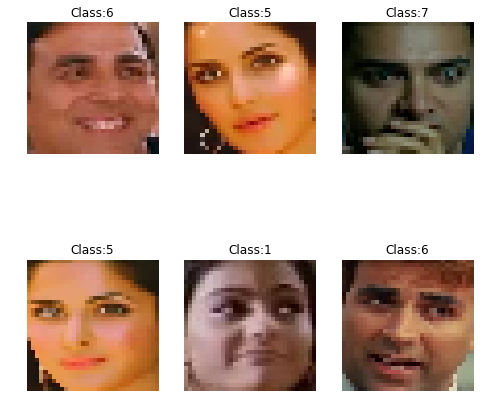

In [7]:
# Show sample images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X[ind,...],y[ind], row=2,col=3)

# Features
    You are provided 6 Features. These features are:
   - Eigen Faces / PCA 
   - Kernel PCA
   - Fisher Face / LDA
   - Kernel Fisher Face
   - VGG Features 
   - Resnet Features

**VGG and Resnet features are last layer features learned by training a model for image classification**
    
---


In [8]:
# Flatten to apply PCA/LDA
X = X.reshape((N,H*W*C))

###  1. Eigen Face:
Use principal component analysis to get the eigen faces. 
Go through the [documentation](!http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on how to use it

In [10]:
def get_pca(X,k):
    """
        Get PCA of K dimension using the top eigen vectors 
    """
    pca = PCA(n_components=k)
    X_k = pca.fit_transform(X)
    X_re = pca.inverse_transform(X_k)
    return X_k,X_re

###  2. Kernel Face:
Use Kernel principal component analysis to get the eigen faces. 

There are different kernels that can be used. Eg. Poly, rbf, sigmoid. Choose the whichever gives the best result or representation. See [link](!https://data-flair.training/blogs/svm-kernel-functions/) for better understanding of these kernels  

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) on how to use it different kernels in Sklearn. 

In [11]:
def get_kernel_pca(X, k,kernel='rbf', degree=3):
    """
        Get PCA of K dimension using the top eigen vectors 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use (“linear” | “poly” | “rbf” | “sigmoid” | “cosine” )
        @param: d => Degree for poly kernels. Ignored by other kernels
    """
    kpca = KernelPCA(n_components=k,kernel=kernel,degree=degree,fit_inverse_transform=True)
    X_k = kpca.fit_transform(X)
    X_re = kpca.inverse_transform(X_k)
    return X_k,X_re

### 3. Fisher Face
Another method similar to the eigenface technique is `fisherfaces` which uses linear discriminant analysis.
This method for facial recognition is less sensitive to variation in lighting and pose of the face than using eigenfaces. Fisherface uses labelled data to retain more of the class-specific information during the dimension reduction stage.

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) on how to use it different kernels in Sklearn. 

In [12]:
def get_lda(X,y, k):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
    """
    lda = LDA(n_components=k)
    X_k = lda.fit_transform(X,y)
    return X_k

### 4. Kernel Fisher Face
Use LDA using different kernels similiar to KernelPCA. Here the input is directly transformed instead of using the kernel trick.  

In [13]:
def get_kernel_lda(X,y,k,kernel='rbf',degree=3):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use ( “poly” | “rbf” | “sigmoid”)
    """
    # Transform  input
    if kernel == "poly":
        X_transformed = X**degree
    elif kernel == "rbf":
        var = np.var(X)
        X_transformed= np.exp(-X/(2*var))
    elif kernel == "sigmoid":
        X_transformed = np.tanh(X)
    else: 
        raise NotImplementedError("Kernel {} Not defined".format(kernel))
        
    klda = LDA(n_components=k)
    X_k = klda.fit_transform(X_transformed,y)
    return X_k

### 5. VGG Features
VGG Neural Networks a 19 layer CNN architecture introduced by Andrew Zisserman([Link](!https://arxiv.org/pdf/1409.1556.pdf) to paper). We are providing you with the last fully connected layer of this model.

The model was trained for face classification on each dataset and each feature the dimension of 4096.

In [14]:
def get_vgg_features(dirpath):
    features = np.load(os.path.join(dirpath,"VGG19_features.npy"))
    return features

### 6. Resnet Features

[Residual neural networks](!https://arxiv.org/pdf/1512.03385.pdf) are CNN with large depth, to effectively train these netwrorks they utilize skip connections, or short-cuts to jump over some layers. This helps solving [vanishing gradient problem](!https://en.wikipedia.org/wiki/Vanishing_gradient_problem) 

A 50 layer resnet model was trained for face classification on each dataset. Each feature the dimension of 2048

In [15]:
def get_resnet_features(dirpath):
    features = np.load(os.path.join(dirpath,"resnet50_features.npy"))
    return features

# Questions

1(a). What are eigen faces? 

___________________________

Patterns which can be observed in all signals(input data)could be - in the domain of facial recognition - the presence of some objects (eyes, nose, mouth) in any face as well as relative distances between these objects. These characteristic features are called eigenfaces in the facial recognition domain (or principal components generally). They can be extracted out of original image data by means of a mathematical tool called Principal Component Analysis (PCA).


1(b).  How many eigen vec-tors/faces are required to “satisfactorily” reconstruct a  person  in  these  three  datasets? (Don’t  forget  to make your argument based on eigen value spectrum) Show appropriate graphs, qualitative examples andmake a convincing argument.

In [16]:
# Compute your features 
# eg.
X_3D = get_kernel_lda(X,y,k=3)

In [17]:
#############TEST##################################
pca = PCA(64)
x = 0
X_proj = pca.fit_transform(X)
print(X_proj.shape)
print(np.cumsum(pca.explained_variance_ratio_))

(400, 64)
[0.24491793 0.41412146 0.48966343 0.53931737 0.57508281 0.605753
 0.62901754 0.64902287 0.66622058 0.67947962 0.69188607 0.70389525
 0.7148083  0.72507142 0.73411765 0.74212783 0.74974711 0.75657479
 0.76313315 0.76941649 0.77543462 0.78129778 0.78672421 0.79178842
 0.79651514 0.80103246 0.80544216 0.80973367 0.81384844 0.81786504
 0.82162138 0.82522499 0.82867005 0.83197694 0.83520339 0.83825027
 0.84121874 0.84408835 0.84692645 0.84968145 0.85234334 0.85492707
 0.85733551 0.85974259 0.86204267 0.86429913 0.86647815 0.86860222
 0.87060978 0.8725649  0.87447985 0.87636438 0.87820988 0.88004058
 0.88181692 0.88354673 0.88521296 0.8868671  0.88842741 0.88996146
 0.89145545 0.89293778 0.89433182 0.89570257]


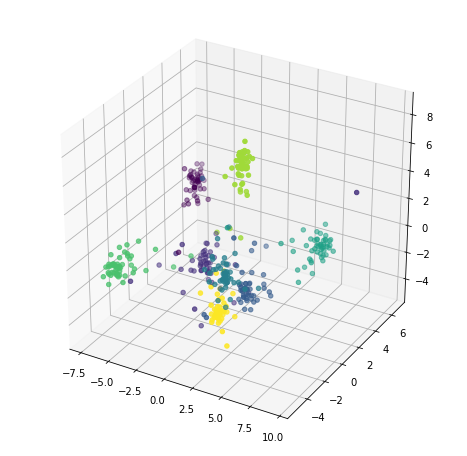

In [29]:
# Create a scatter plot  
# eg.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3D[:,0],X_3D[:,1],X_3D[:,2],c=y)
# plt.scatter(X_proj[:,0],X_proj[:,1],c=y)
# plt.show()

The eigenvalues:
	 [ 2.24942381e+01+0.00000000e+00j  1.55403256e+01+0.00000000e+00j
  6.93807602e+00+0.00000000e+00j ...  3.10278817e-18-2.01104998e-18j
  9.66408700e-19+0.00000000e+00j -8.00596379e-18+0.00000000e+00j]
[401 409 408 ...   2   1   0]


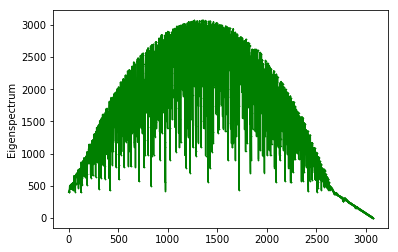

Using 130 dimensions based on the eigen spectrum and also the variance computed for that many dimensions in the commented out block below


In [30]:
# Plot the eigen value spectrum 
import numpy
co = np.cov(np.transpose(X))
eigenvalues = numpy.linalg.eigvals(co)
# eigenvalues.sort()
print("The eigenvalues:\n\t", eigenvalues)

idx = eigenvalues.argsort()
print(idx)

plt.plot(idx, color='green', marker='D', markersize=0.5)
plt.ylabel('Eigenspectrum')
plt.show()

print("Using 130 dimensions based on the eigen spectrum and also the variance computed for that many dimensions in the commented out block below")

In [250]:
###########TEST#################
print(X_3D.shape)
# X_inv_proj = pca.inverse_transform(X_3D)
# X_proj_img = np.reshape(X_inv_proj,(400,130,-1))
# fig = plt.figure(figsize=(12,12))
# fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# for i in range(130):
#     ax = fig.add_subplot(12, 12, i+1, xticks=[], yticks=[]) 
#     ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')

(400, 3)


1(c). Reconstruct  the  image  back for each case


In [20]:
# print(X.shape)
def reconstruct_images(X,k,technique='pca',kernel='rbf',degree=3):
    """
        Reconstruct the images back by just using the selected principal components. 


        You have to write the code in this code block.
        You can change the functions provided above (eg, get_pca, get_lda) for your use case. 
            
        @params: 
                Input parameters

        @return reconstructed_X => reconstructed image
        
    """

    if technique=='pca':
        X_k,reconstruct_X = get_pca(X,k)
    elif technique=='kernel_pca':
        X_k,reconstruct_X = get_kernel_pca(X, k,kernel, degree)

    return reconstruct_X    

# #     pass
#     nComp = 3
#     Xhat = np.dot(pca.transform(X_k)[:,:nComp], pca.components_[:nComp,:])
#     Xhat += mu

#     print(Xhat[0,])
# #     reconstruct_X = None

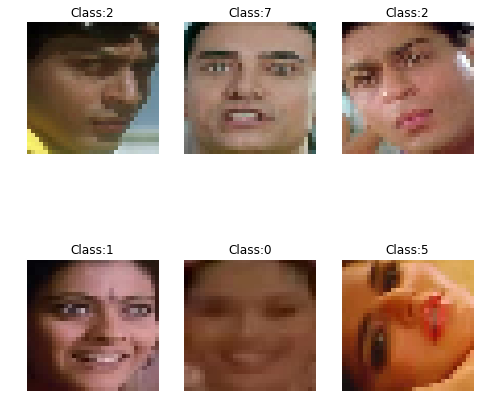

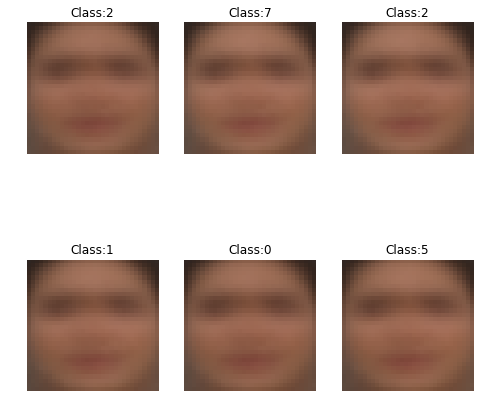

Reconstruction error: 0.16722643335539755


In [22]:
# Display results 
X_reconstructed = reconstruct_images(X,130,technique='kernel_pca')

# code goes here
if opt['is_grayscale']:
    out_dim = (N,H,W)
    temp_X_reconstructed = np.reshape(X_reconstructed,out_dim)
    temp_X =  np.reshape(X,out_dim)
else:
    out_dim = (N,H,W,C)
    temp_X_reconstructed = np.reshape(X_reconstructed,out_dim)
    temp_X = np.reshape(X,out_dim)

# Display random images
ind = np.random.randint(0,y.shape[0],6)
disply_images(temp_X[ind,...],y[ind],row=2,col=3)
disply_images(temp_X_reconstructed[ind,...],y[ind],row=2,col=3)

# Show the reconstruction error
print("Reconstruction error:",np.sqrt(np.mean((X - X_reconstructed)**2)))

In [23]:
error = (np.sqrt(np.mean((X - X_reconstructed)**2)))

1(d). Which person/identity is difficult to represent com-pactly with fewer eigen vectors?  Why is that?  Explain with your empirical observations and intuitive answers

In [33]:
# code goes here

var = [0,1,2,3,4,5,6,7,8,9]
constant = var[1]
maxi = var[1] - 1
maxcls = maxi
for clss in imfdb_dict.values():
    err = np.sqrt(np.mean((X[y==clss] - X_reconstructed[y==clss])**2))
    if err> maxi:
        maxi = err
        maxcls = clss
    else:
        pass
    print('Class '+str(clss)+' Error : ',err)

print('Mean Square Error,Total : ',error)
print()
print()
print("Maximum error for class:",maxcls)
print()
print("Katrina Kaif's images are hardest to identify because the images are mostly blurred and the angles available in the given datasets are also not from similar/congruent angles. Ratio of face in the image also makes a difference. Complex features are harder to represent in lower dimensions. So, hair, dimples etc. might not be well represented as well.")

Class 0 Error :  0.14266112221220997
Class 1 Error :  0.15027930985971202
Class 2 Error :  0.13236659798034664
Class 3 Error :  0.17254464389519486
Class 4 Error :  0.1765556083821468
Class 5 Error :  0.20656515303940012
Class 6 Error :  0.15610944916029293
Class 7 Error :  0.187823314641868
Mean Square Error,Total :  0.16722643335539755


Maximum error for class: 5

Katrina Kaif's images are hardest to identify because the images are mostly blurred and the angles available in the given datasets are also not from similar/congruent angles. Ratio of face in the image also makes a difference. Complex features are harder to represent in lower dimensions. So, hair, dimples etc. might not be well represented as well.


2(a). Use any classifier(MLP, Logistic regression, SVM, Decision Trees) and find the classification accuracy. 

2(b)Which method works well? Do a comparitivestudy. 




In [34]:
# Define your classifier here. You can use libraries like sklearn to create your classifier 
from sklearn.neural_network  import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split

class Classifier():
    def __init__(self):
#         super.__init__()
#         self.classfier = SVC(gamma='auto',kernel='rbf',C=1)
        self.classfier = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)
#         self.classfier = LogisticRegression(random_state=0, solver='lbfgs', max_iter=300, multi_class='multinomial')

    # Define your parameters eg, W,b, max_iterations etc. 
    
    def classify(self,X):
        prediction = self.classfier.predict(X)

        return prediction
        
    def confusion_matrix(self,pred,y):
        
        return confusion_matrix(y,pred)

    def train(self,X_train,y_train):
        
        self.classfier.fit(X_train,y_train)
        return
        
    def validate(self,X_validate,y_validate):
        
        # Create a confusion matrix
        predicted = self.classify(X_validate)
        confusion_matrix = self.confusion_matrix(predicted,y_validate)
        
        # Calculate Validation accuracy
        self.accuracy = confusion_matrix.trace()/len(y_validate)
    
        # Calculate precision, recall and F1 score
        self.precision,self.recall,self.f1,_ = precision_recall_fscore_support(y_validate,predicted,average='macro',beta=1)
        
    
        return self.accuracy, self.precision, self.recall, self.f1

In [35]:
# Create a train and validation split to train your classifier 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
classifier = Classifier()
classifier.train(X_train,y_train)
classifier.validate(X_test,y_test)
print("After testing all, MLP is seen to perform best")
print("Accuracy of mlp on original space: ",classifier.accuracy)

After testing all, MLP is seen to perform best
Accuracy of mlp on original space:  0.7375


In [43]:
def get_features(X,y,method,dirpath):
    if method=='pca':
        arr = get_pca(X,k=130)[0]
    elif method=='k_pca':
        arr = get_kernel_pca(X,k=130)[0]
    elif method=='lda':
        arr = get_lda(X,y,k=130)
    elif method=='k_lda':
        arr = get_kernel_lda(X,y,k=130)
    elif method=='resnet':
        arr = get_resnet_features(dirpath)
    elif method=='vgg':
        arr = get_vgg_features(dirpath)
        
    return arr

In [44]:
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, classification error, accuracy, f1-score

# Print the table. (You can use Pandas)
print("Best model comes out to be MLP, so printing tables using only that.\n")
import pandas
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from collections import defaultdict
#import py_entitymatching as em

dirpath_IIIT = 'C:\\Users\\Aisha\\Downloads\\IIIT-Assignment\\dataset\\dataset\\IIIT-CFW'
dirpath_IMFDB = 'C:\\Users\\Aisha\\Downloads\\IIIT-Assignment\\dataset\\dataset\\IMFDB'
dirpath_yale = 'C:\\Users\\Aisha\\Downloads\\IIIT-Assignment\\dataset\\dataset\\Yale_face_database'
k = 7

df_IIIT = pd.DataFrame()
df_IIIT['feature_used'] = []
df_IIIT['reduced dimension space'] = []
df_IIIT['verification error'] = []
df_IIIT['accuracy'] = []
df_IIIT['f1-score'] = []

for classifier_i in ['pca', 'k_pca', 'lda', 'k_lda', 'resnet']:
    X = get_features(X_IIIT,y_IIIT,classifier_i,dirpath_IIIT)
    X_train, X_test, y_train, y_test = train_test_split(X, y_IIIT, test_size=0.25, random_state=0)
    classifier = Classifier()
    classifier.train(X_train, y_train)
    results = classifier.validate(X_test, y_test)

    
    f1 = metrics.f1_score(y_test, classifier.classify(X_test), average="micro")
#     print(classification_report(y_test,classifier.classify(X_test)))
#     print()

    new_df = pd.DataFrame(
        [classifier_i, X.shape[1], (1-results[0]), results[0], f1],
    ).T
    new_df.columns = ['feature_used', 'reduced dimension space', 'verification error', 'accuracy', 'f1-score']
    
    df_IIIT = df_IIIT.append(new_df)
    
df_IMFDB = pd.DataFrame()
df_IMFDB['feature_used'] = []
df_IMFDB['reduced dimension space'] = []
df_IMFDB['verification error'] = []
df_IMFDB['accuracy'] = []
df_IMFDB['f1-score'] = []

for classifier_i in ['pca', 'k_pca', 'lda', 'k_lda', 'resnet']:
    X = get_features(X_IMFDB,y_IMFDB,classifier_i,dirpath_IMFDB)
    X_train, X_test, y_train, y_test = train_test_split(X, y_IMFDB, test_size=0.25, random_state=0)
    classifier = Classifier()
    classifier.train(X_train, y_train)
    results = classifier.validate(X_test, y_test)
    f1 = metrics.f1_score(y_test, classifier.classify(X_test), average="micro")

    new_df = pd.DataFrame(
        [classifier_i, X.shape[1], (1-results[0]), results[0], f1],
    ).T
    new_df.columns = ['feature_used', 'reduced dimension space', 'verification error', 'accuracy', 'f1-score']
    
    df_IMFDB = df_IMFDB.append(new_df)
    
df_yale = pd.DataFrame()
df_yale['feature_used'] = []
df_yale['reduced dimension space'] = []
df_yale['verification error'] = []
df_yale['accuracy'] = []
df_yale['f1-score'] = []

for classifier_i in ['pca', 'k_pca', 'lda', 'k_lda', 'resnet']:
    X = get_features(X_yale,y_yale,classifier_i,dirpath_yale)
    X_train, X_test, y_train, y_test = train_test_split(X, y_yale, test_size=0.25, random_state=0)
    classifier = Classifier()
    classifier.train(X_train, y_train)
    results = classifier.validate(X_test, y_test)
    f1 = metrics.f1_score(y_test, classifier.classify(X_test), average="micro")

    new_df = pd.DataFrame(
        [classifier_i, X.shape[1], (1-results[0]), results[0], f1],
    ).T
    new_df.columns = ['feature_used', 'reduced dimension space', 'verification error', 'accuracy', 'f1-score']
    
    df_yale = df_yale.append(new_df)
    
print('IIIT-CFW Dataset:')
print(df_IIIT)
print()

print('IMFDB Dataset')
print(df_IMFDB)
print()

print('Yale Dataset')
print(df_yale)

# self.precision,self.recall,self.f1,_ = precision_recall_fscore_support(y_validate,predicted,average='macro',beta=1)


Best model comes out to be MLP, so printing tables using only that.

IIIT-CFW Dataset:
  feature_used reduced dimension space verification error  accuracy  f1-score
0          pca                     130           0.446429  0.553571  0.553571
0        k_pca                     130           0.458333  0.541667  0.541667
0          lda                       7          0.0595238  0.940476  0.940476
0        k_lda                       7          0.0416667  0.958333  0.958333
0       resnet                    2048           0.047619  0.952381  0.952381

IMFDB Dataset
  feature_used reduced dimension space verification error accuracy f1-score
0          pca                     130               0.24     0.76     0.76
0        k_pca                     130               0.28     0.72     0.72
0          lda                       7               0.03     0.97     0.97
0        k_lda                       7                0.1      0.9      0.9
0       resnet                    2048            

In [276]:
# For each dataset print the confusion matrix for the best model 
print("Best model comes out to be MLP, so printing confusion matrix only for that.\n")
print(confusion_matrix(y_test,classifier.classify(X_test)))

Best model comes out to be MLP, so printing confusion matrix only for that.

[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]]


3. Similiar to 1(b) use t-SNE based visilization of faces?  Does it makesense?  Do you see similar people coming together?or something else?  Can you do visualization datasetwise and combined? Here you will use a popular implementation.(Worth  reading and understanding  t-SNE.  We  will not discuss it in the class and out of scope for thiscourse/exams.

In [45]:
def get_features(X,y,method,dirpath):
    if method=='pca':
        arr = get_pca(X,k=130)[0]
    elif method=='k_pca':
        arr = get_kernel_pca(X,k=130)[0]
    elif method=='lda':
        arr = get_lda(X,y,k=130)
    elif method=='k_lda':
        arr = get_kernel_lda(X,y,k=130)
    elif method=='resnet':
        arr = get_resnet_features(dirpath)
    elif method=='vgg':
        arr = get_vgg_features(dirpath)
        
    return arr

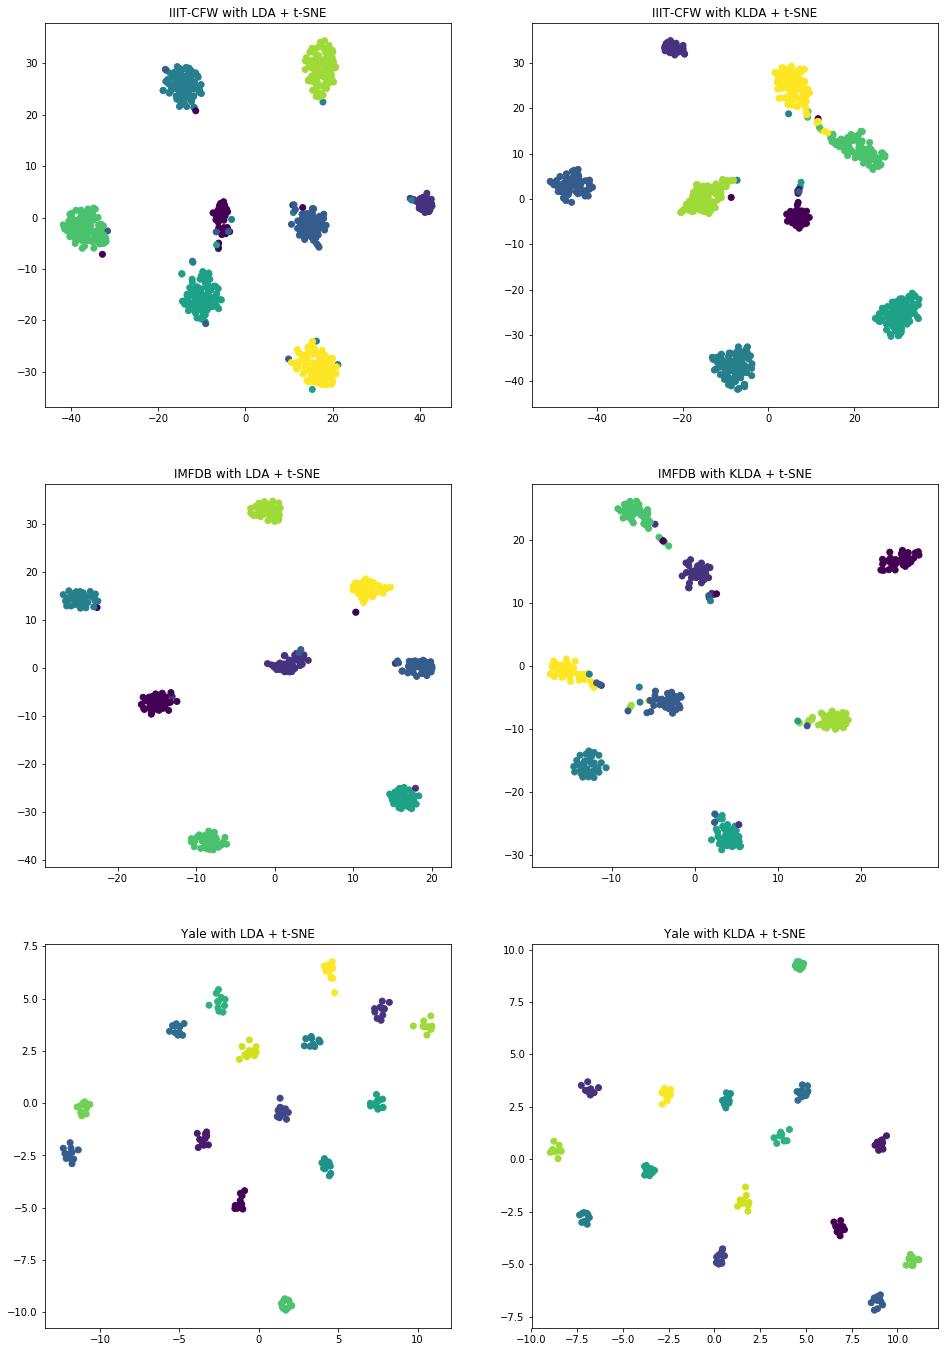

In [46]:
# # Compute TSNE for different features and create a scatter plot

# X =  # feature 
# k = 3 # Number of components in TSNE

# # Compute
# X_TSNE = TSNE(n_components=k).fit_transform(X)

# # Plot the representation in 2d/3d

# Compute TSNE for different features and create a scatter plot

fig = plt.figure(figsize=(16,24))

X = get_features(X_IIIT,y_IIIT,'lda',dirpath_IIIT)
k = 2 # Number of components in TSNE
X_TSNE = TSNE(n_components=k).fit_transform(X)
ax1 = fig.add_subplot(321)
ax1.title.set_text('IIIT-CFW with LDA + t-SNE')
ax1.scatter(X_TSNE[:,0],X_TSNE[:,1],c=y_IIIT)

X = get_features(X_IIIT,y_IIIT,'k_lda',dirpath_IIIT)
X_TSNE = TSNE(n_components=k).fit_transform(X)
ax2 = fig.add_subplot(322)
ax2.title.set_text('IIIT-CFW with KLDA + t-SNE')
ax2.scatter(X_TSNE[:,0],X_TSNE[:,1],c=y_IIIT)

X =  get_features(X_IMFDB,y_IMFDB,'lda',dirpath_IMFDB)
X_TSNE = TSNE(n_components=k).fit_transform(X)
ax3 = fig.add_subplot(323)
ax3.title.set_text('IMFDB with LDA + t-SNE')
ax3.scatter(X_TSNE[:,0],X_TSNE[:,1],c=y_IMFDB)

X =  get_features(X_IMFDB,y_IMFDB,'k_lda',dirpath_IMFDB)
X_TSNE = TSNE(n_components=k).fit_transform(X)
ax4 = fig.add_subplot(324)
ax4.title.set_text('IMFDB with KLDA + t-SNE')
ax4.scatter(X_TSNE[:,0],X_TSNE[:,1],c=y_IMFDB)

X =  get_features(X_yale,y_yale,'lda',dirpath_yale)
X_TSNE = TSNE(n_components=k).fit_transform(X)
ax5 = fig.add_subplot(325)
ax5.title.set_text('Yale with LDA + t-SNE')
ax5.scatter(X_TSNE[:,0],X_TSNE[:,1],c=y_yale)

X =  get_features(X_yale,y_yale,'k_lda',dirpath_yale)
X_TSNE = TSNE(n_components=k).fit_transform(X)
ax6 = fig.add_subplot(326)
ax6.title.set_text('Yale with KLDA + t-SNE')
ax6.scatter(X_TSNE[:,0],X_TSNE[:,1],c=y_yale)

#### Yes, similar faces do come close. t-SNE basically just keeps adjusting the values till the matrix comes close enough to the actual training one. So, it reduces to a lower dimension and still predicts very well.

In [47]:
print("Yes, similar faces do come close. t-SNE basically just keeps adjusting the values till the matrix comes close enough to the actual training one. So, it reduces to a lower dimension and still predicts very well.")


Yes, similar faces do come close. t-SNE basically just keeps adjusting the values till the matrix comes close enough to the actual training one. So, it reduces to a lower dimension and still predicts very well.


4.`face`  is  used  for  verification.   

4(a) How do we formulate the problem using KNN 

4(b) How do we analyze the performance ? suggest  the  metrics  (like  accuracy) that is appropriate for this task.

_______________________________________________________________________

4(c)Show empirical re-sults  with  all  the  representations

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

class FaceVerification():
    def __init__(self, k):
        self.class_ = KNeighborsClassifier(n_neighbors=k)
    
    # Define your parameters eg, W,b, max_iterations etc. 
    
    def verify(self,X,class_id):

        verification_results = self.class_.predict(X) == class_id
        return verification_results
        
    def train(self,X_train,y_train):
        
        self.class_.fit(X_train, y_train)
        
    def validate(self,X_validate,y_validate):
        
        prediction = self.class_.predict(X_validate)
        acc = accuracy_score(prediction, y_validate)
        f1 = precision_score(prediction, y_validate, average='macro')
        
        return acc, f1

In [263]:
from sklearn.model_selection import train_test_split

# Create a train and validation split and show your results 
dirpath_IIIT = './datasets/IIIT-CFW/'
k = 7

X = get_features(X_IIIT,y_IIIT,'lda',dirpath_IIIT)
X_train, X_test, y_train, y_test = train_test_split(X, y_IIIT, test_size=0.25, random_state=0)
face = FaceVerification(k)
face.train(X_train, y_train)
verify = face.verify(X_test, y_test)
results = face.validate(X_test, y_test)
print('LDA: accuracy, f1 score - ', end='')
print(results)
print((list(verify).count(True)/len(verify))==results[0])

X = get_features(X_IIIT,y_IIIT,'k_lda',dirpath_IIIT)
X_train, X_test, y_train, y_test = train_test_split(X, y_IIIT, test_size=0.25, random_state=0)
face = FaceVerification(k)
face.train(X_train, y_train)
verify = face.verify(X_test, y_test)
results = face.validate(X_test, y_test)
print('Kernel LDA: accuracy, f1 score - ', end='')
print(results)
print((list(verify).count(True)/len(verify))==results[0])

X = get_features(X_IIIT,y_IIIT,'k_pca',dirpath_IIIT)
X_train, X_test, y_train, y_test = train_test_split(X, y_IIIT, test_size=0.25, random_state=0)
face = FaceVerification(k)
face.train(X_train, y_train)
verify = face.verify(X_test, y_test)
results = face.validate(X_test, y_test)
print('Kernel PCA: accuracy, f1 score - ', end='')
print(results)
print((list(verify).count(True)/len(verify))==results[0])

X = get_features(X_IIIT,y_IIIT,'resnet',dirpath_IIIT)
X_train, X_test, y_train, y_test = train_test_split(X, y_IIIT, test_size=0.25, random_state=0)
face = FaceVerification(k)
face.train(X_train, y_train)
verify = face.verify(X_test, y_test)
results = face.validate(X_test, y_test)
print('Resnet: accuracy, f1 score - ', end='')
print(results)
print((list(verify).count(True)/len(verify))==results[0])


# list(verify).count(True)/len(verify)

LDA: accuracy, f1 score - (0.9464285714285714, 0.931611699703805)
True
Kernel LDA: accuracy, f1 score - (0.9583333333333334, 0.9454608606496477)
True
Kernel PCA: accuracy, f1 score - (0.4583333333333333, 0.45204280051248014)
True
Resnet: accuracy, f1 score - (0.9642857142857143, 0.9616617782378651)
True


In [51]:
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, verification error, accuracy, precision

# Print the table. (You can use Pandas)

dirpath_IIIT = 'C:\\Users\\Aisha\\Downloads\\IIIT-Assignment\\dataset\\dataset\\IMFDB\\IIIT-CFW'
dirpath_IMFDB = 'C:\\Users\\Aisha\\Downloads\\IIIT-Assignment\\dataset\\dataset\\IMFDB'
dirpath_yale = 'C:\\Users\\Aisha\\Downloads\\IIIT-Assignment\\dataset\\dataset\\IMFDB\\Yale_face_database'
k = 7

df_IIIT = pd.DataFrame()
df_IIIT['feature_used'] = []
df_IIIT['reduced dimension space'] = []
df_IIIT['verification error'] = []
df_IIIT['accuracy'] = []
df_IIIT['precision'] = []

for classifier in ['pca', 'k_pca', 'lda', 'k_lda']:
    X = get_features(X_IIIT,y_IIIT,classifier,dirpath_IIIT)
    X_train, X_test, y_train, y_test = train_test_split(X, y_IIIT, test_size=0.25, random_state=0)
    face = FaceVerification(k)
    face.train(X_train, y_train)
    results = face.validate(X_test, y_test)
    
    new_df = pd.DataFrame(
        [classifier, X.shape[1], (1-results[0]), results[0], results[1]],
    ).T
    new_df.columns = ['feature_used', 'reduced dimension space', 'verification error', 'accuracy', 'precision']
    
    df_IIIT = df_IIIT.append(new_df)
    
df_IMFDB = pd.DataFrame()
df_IMFDB['feature_used'] = []
df_IMFDB['reduced dimension space'] = []
df_IMFDB['verification error'] = []
df_IMFDB['accuracy'] = []
df_IMFDB['precision'] = []

for classifier in ['pca', 'k_pca', 'lda', 'k_lda', 'resnet']:
    X = get_features(X_IMFDB,y_IMFDB,classifier,dirpath_IMFDB)
    X_train, X_test, y_train, y_test = train_test_split(X, y_IMFDB, test_size=0.25, random_state=0)
    face = FaceVerification(k)
    face.train(X_train, y_train)
    results = face.validate(X_test, y_test)
    
    new_df = pd.DataFrame(
        [classifier, X.shape[1], (1-results[0]), results[0], results[1]],
    ).T
    new_df.columns = ['feature_used', 'reduced dimension space', 'verification error', 'accuracy', 'precision']
    
    df_IMFDB = df_IMFDB.append(new_df)
    
df_yale = pd.DataFrame()
df_yale['feature_used'] = []
df_yale['reduced dimension space'] = []
df_yale['verification error'] = []
df_yale['accuracy'] = []
df_yale['precision'] = []

for classifier in ['pca', 'k_pca', 'lda', 'k_lda']:
    X = get_features(X_yale,y_yale,classifier,dirpath_yale)
    X_train, X_test, y_train, y_test = train_test_split(X, y_yale, test_size=0.25, random_state=0)
    face = FaceVerification(k)
    face.train(X_train, y_train)
    results = face.validate(X_test, y_test)
    
    new_df = pd.DataFrame(
        [classifier, X.shape[1], (1-results[0]), results[0], results[1]],
    ).T
    new_df.columns = ['feature_used', 'reduced dimension space', 'verification error', 'accuracy', 'precision']
    
    df_yale = df_yale.append(new_df)
    
print('IIIT-CFW Dataset:')
print(df_IIIT)
print()

print('IMFDB Dataset')
print(df_IMFDB)
print()

print('Yale Dataset')
print(df_yale)

IIIT-CFW Dataset:
  feature_used reduced dimension space verification error  accuracy precision
0          pca                     130           0.589286  0.410714  0.405744
0        k_pca                     130           0.541667  0.458333  0.452043
0          lda                       7          0.0535714  0.946429  0.931612
0        k_lda                       7          0.0416667  0.958333  0.945461

IMFDB Dataset
  feature_used reduced dimension space verification error accuracy precision
0          pca                     130               0.54     0.46   0.46466
0        k_pca                     130               0.53     0.47  0.472994
0          lda                       7               0.04     0.96  0.953777
0        k_lda                       7               0.08     0.92  0.925656
0       resnet                    2048               0.07     0.93  0.937111

Yale Dataset
  feature_used reduced dimension space verification error  accuracy precision
0          pca         

In [57]:
print("Using cartoon vs Real images")
# Load data
dirpath_IIIT = 'C:\\Users\\Aisha\\Downloads\\IIIT-Assignment\\dataset\\dataset\\IIIT-CFW'
X_IIIT,y_IIIT = load_data(dirpath_IIIT)
N_IIIT,H_IIIT,W_IIIT = X_IIIT.shape[0:3]
C_IIIT = 1 if opt['is_grayscale'] else X_IIIT.shape[3]
X_IIIT = X_IIIT.reshape((N_IIIT, H_IIIT*W_IIIT*C_IIIT))

dirpath_IMFDB = 'C:\\Users\\Aisha\\Downloads\\IIIT-Assignment\\dataset\\dataset\\IMFDB'
X_IMFDB,y_IMFDB = load_data(dirpath_IMFDB)
N_IMFDB,H_IMFDB,W_IMFDB = X_IMFDB.shape[0:3]
C_IMFDB = 1 if opt['is_grayscale'] else X_IMFDB.shape[3]
X_IMFDB = X_IMFDB.reshape((N_IMFDB, H_IMFDB*W_IMFDB*C_IMFDB))

dirpath_yale = 'C:\\Users\\Aisha\\Downloads\\IIIT-Assignment\\dataset\\dataset\\Yale_face_database'
X_yale,y_yale = load_data(dirpath_yale)
N_yale,H_yale,W_yale = X_yale.shape[0:3]
C_yale = 1 if opt['is_grayscale'] else X_yale.shape[3]
X_yale = X_yale.reshape((N_yale, H_yale*W_yale*C_yale))

X = np.concatenate((X_IIIT,X_IMFDB))
y = np.concatenate((y_IIIT,y_IMFDB))

Using cartoon vs Real images
Dataset shape: (672, 32, 32, 3)
Dataset shape: (400, 32, 32, 3)
Dataset shape: (165, 32, 32, 3)


In [58]:
# Define your features
X_lda = get_kernel_lda(X,y,k=7,kernel='sigmoid')
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.25, random_state=0)


In [59]:
# Create your classifier
classifier = MLPClassifier(
    hidden_layer_sizes=(150,50,50,100), 
    max_iter=290,
    activation = 'relu',
    solver='adam',
    random_state=0
)

# Validate your classifier
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

report = classification_report(y_test, pred, output_dict=True) 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       0.96      0.96      0.96        23
           2       1.00      0.97      0.99        38
           3       1.00      0.97      0.98        29
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        44
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        34

   micro avg       0.99      0.99      0.99       268
   macro avg       0.98      0.99      0.98       268
weighted avg       0.99      0.99      0.99       268



In [60]:
# Show qualitative results such as accuracy, k-fold validation, TSNE/PCA/Isomap plots, etc.  
print('Accuracy: ', report['accuracy'], '\tf1-Score: ', f1_score(y_test, pred, average="micro"))

KeyError: 'accuracy'

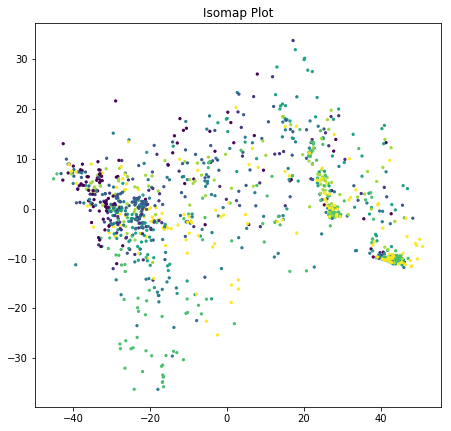

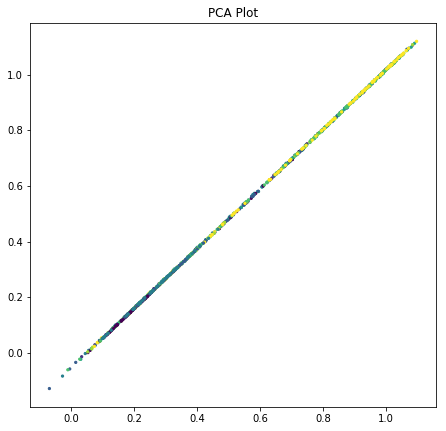

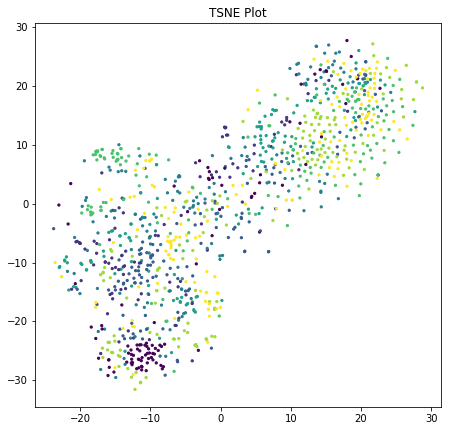

In [61]:
def get_pca(X,k):
    """
        Get PCA of K dimension using the top eigen vectors 
    """
    pca = PCA(n_components=k)
    X_k = pca.fit_transform(X)
    X_re = pca.inverse_transform(X_k)
    return X_k,X_re

from sklearn.manifold import Isomap
fig=plt.figure(figsize=(16, 24))
fig.add_subplot(321)
X_TSNE = Isomap(n_components=2).fit_transform(X)
plt.title('Isomap Plot')
plt.scatter(X_TSNE[:,0],X_TSNE[:,1],c=y, s=5)

fig=plt.figure(figsize=(16, 24))
fig.add_subplot(322)
X_k, X_PCA = get_pca(X,2)
plt.title('PCA Plot')
plt.scatter(X_PCA[:,0],X_PCA[:,1],c=y, s=5)

fig=plt.figure(figsize=(16, 24))
fig.add_subplot(323)
X_TSNE = TSNE(n_components=2).fit_transform(X)
plt.title('TSNE Plot')
plt.scatter(X_TSNE[:,0],X_TSNE[:,1],c=y, s=5)

In [62]:
from sklearn.model_selection import KFold
print('Doing k-fold validation')
k_fold = KFold(n_splits=5)

i = 1
for train, test in k_fold.split(X_lda):
    print('\n','*'*50, '\nClassification report for split #{0}'.format(i))
    classifier.fit(X_lda[train], y[train])
    pred_ = classifier.predict(X_lda[test])
    
    print(classification_report(y[test], pred_))
    i+=1

Doing k-fold validation

 ************************************************** 
Classification report for split #1
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       0.98      1.00      0.99        42
           3       1.00      0.97      0.98       101
           4       1.00      0.95      0.98        22
           7       0.00      0.00      0.00         0

   micro avg       0.98      0.98      0.98       215
   macro avg       0.79      0.78      0.79       215
weighted avg       0.99      0.98      0.98       215


 ************************************************** 
Classification report for split #2
              precision    recall  f1-score   support

           2       1.00      0.97      0.99        79
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00        78
           6       1.00      1.00      1.00        58

   micro avg       0.99      0.99    